# Digit Recognizer Modified 2.0

## Importing, Data Processing, Visualization

### Suggestions from ChatGPT

- Use TensorFlow image processor to augment and alter images
- Try different activation functions

### Import necessary libraries

In [91]:
# importing numpy
import numpy as np
np.random.seed(42)

In [92]:
# importing tensorflow
import tensorflow as tf
tf.random.set_seed(42)

In [93]:
# importing pandas
import pandas as pd

In [94]:
# importing keras
from tensorflow import keras
from keras import backend as K


In [95]:
# importing seaborn
import seaborn as sns
sns.set(style="whitegrid")

In [96]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST Dataset

In [97]:
X = pd.read_csv('train.csv')
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting, Data Exploration and Visualization

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
(X_train, X_text, y_train, y_test) = train_test_split(
    X.drop('label', axis=1),
    X['label'],
    test_size=0.2,
    random_state=42
)

display(X_train.shape, X_text.shape, y_train.shape, y_test.shape)

(33600, 784)

(8400, 784)

(33600,)

(8400,)

In [100]:
# Number of output labels
num_labels = len(y_train.unique())
num_labels

10

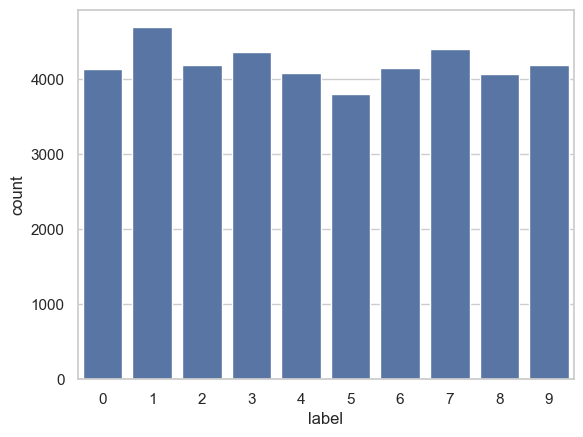

In [101]:
# Distribution of the labels
sns.countplot(x='label', data=X)
plt.show()

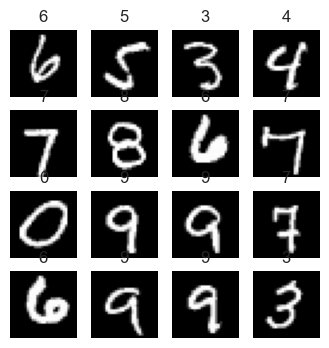

In [102]:
# Visualizing some of the images
indexes = np.random.randint(0, X_train.shape[0], 16)
images = X_train.iloc[indexes]
labels = y_train.iloc[indexes]

plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(y_train.iloc[i])
    plt.axis('off')

plt.show()

In [103]:
# Scale the data
X_train = X_train / 255.0
X_text = X_text / 255.0

### Data Augmentation

This uses a Keras sequential model to adjust the images according to the layers in the model. In this case, a random rotation, zoom, contrast and translaction.

In [104]:
from keras import layers

In [131]:
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.05),
        layers.RandomTranslation(0.08, 0.08),
    ]
)

In [132]:
X_train_mod = data_augmentation(X_train.values.reshape(-1, 28, 28, 1))


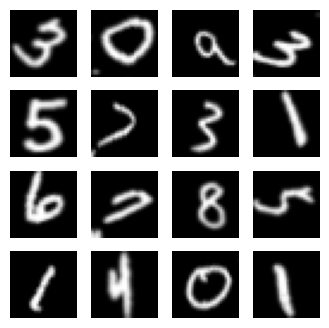

In [133]:
# Visualizing some of the augmented images
np.random.seed(42)
indexes = np.random.randint(0, X_train_mod.shape[0], 16)
images = X_train_mod.numpy()[indexes]

plt.figure(figsize=(4, 4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [134]:
X_train_mod.shape

TensorShape([33600, 28, 28, 1])